In [1]:
import numpy as np
from streamtracer import StreamTracer, VectorGrid
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.units as u
from astropy.time import Time
from time import time
from sunpy.map import Map
from matplotlib.ticker import MultipleLocator

import rtmag.paper.metric as m
from rtmag.paper.load import load_input_label, MyModel
from rtmag.paper.metric import vector_norm, current_density, curl

In [2]:
hmibr = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/hmi/hmi.sharp_cea_720s.377.20110214_000000_TAI.Br.fits"

aia94 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/94/aia.lev1_euv_12s.2011-02-14T000004Z.94.image_lev1.fits"
aia131 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/131/aia.lev1_euv_12s.2011-02-14T000011Z.131.image_lev1.fits"
aia171 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/171/aia.lev1_euv_12s.2011-02-14T000001Z.171.image_lev1.fits"
aia193 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/193/aia.lev1_euv_12s.2011-02-14T000009Z.193.image_lev1.fits"
aia211 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/211/aia.lev1_euv_12s.2011-02-14T000002Z.211.image_lev1.fits"
aia304 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/304/aia.lev1_euv_12s.2011-02-14T000010Z.304.image_lev1.fits"
aia335 = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158_single/aia/335/aia.lev1_euv_12s.2011-02-14T000005Z.335.image_lev1.fits"

In [3]:
left_title = "ISEE"
right_title = "PINO"
title_y = 1.05

title_fontsize = 30
bar_title_fontsize = 15
bar_ticks_fontsize = 15

label_fontsize = 15
tick_fontsize = 15

xlocator = 50
ylocator = 50

bar_size = "4%"
bar_pad = "6%"

major_ticksize = 8

#--------------------------------------------

fl_title_fontsize = 30
fl_title_y = 1.05
annotation_fontsize = 18
fl_tick_fontsize = 18
fl_label_fontsize = 18

fl_major_ticksize = 8

In [4]:
hmi_Br_map = Map(hmibr)

aia_94_map = Map(aia94)
aia_131_map = Map(aia131)
aia_171_map = Map(aia171)
aia_193_map = Map(aia193)
aia_211_map = Map(aia211)
aia_304_map = Map(aia304)
aia_335_map = Map(aia335)

aia_94 = aia_94_map.reproject_to(hmi_Br_map.wcs)
aia_131 = aia_131_map.reproject_to(hmi_Br_map.wcs)
aia_171 = aia_171_map.reproject_to(hmi_Br_map.wcs)
aia_193 = aia_193_map.reproject_to(hmi_Br_map.wcs)
aia_211 = aia_211_map.reproject_to(hmi_Br_map.wcs)
aia_304 = aia_304_map.reproject_to(hmi_Br_map.wcs)
aia_335 = aia_335_map.reproject_to(hmi_Br_map.wcs)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


In [5]:
meta_path = "/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_40.pt"

In [6]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [7]:
idx = 13
input_files[idx], label_files[idx]

(PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110214_000000.npz'),
 PosixPath('/mnt/f/isee_dataset/11158/label/label_11158_20110214_000000.npz'))

In [8]:
mm = MyModel(meta_path)

Model loaded from epoch 40


In [9]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

1.9942657947540283 seconds


In [10]:
B = mm.get_label(label_files[idx])
Bp = mm.get_pot(label_files[idx])
dx, dy, dz, dV = mm.get_dV(input_files[idx])
x, y, z = mm.get_coords(label_files[idx])

In [11]:
res = m.evaluate(b, B)

C_vec     : 0.96
C_cs      : 0.94
E_n'      : 0.70
E_m'      : 0.55
eps       : 0.91


In [12]:
Lx = hmi_Br_map.data.shape[1]
Ly = hmi_Br_map.data.shape[0]

Lx * 0.36, Ly * 0.36

(267.84, 135.72)

In [13]:
x[-1] - x[0], y[-1] - y[0]

(271.13202, 137.38814)

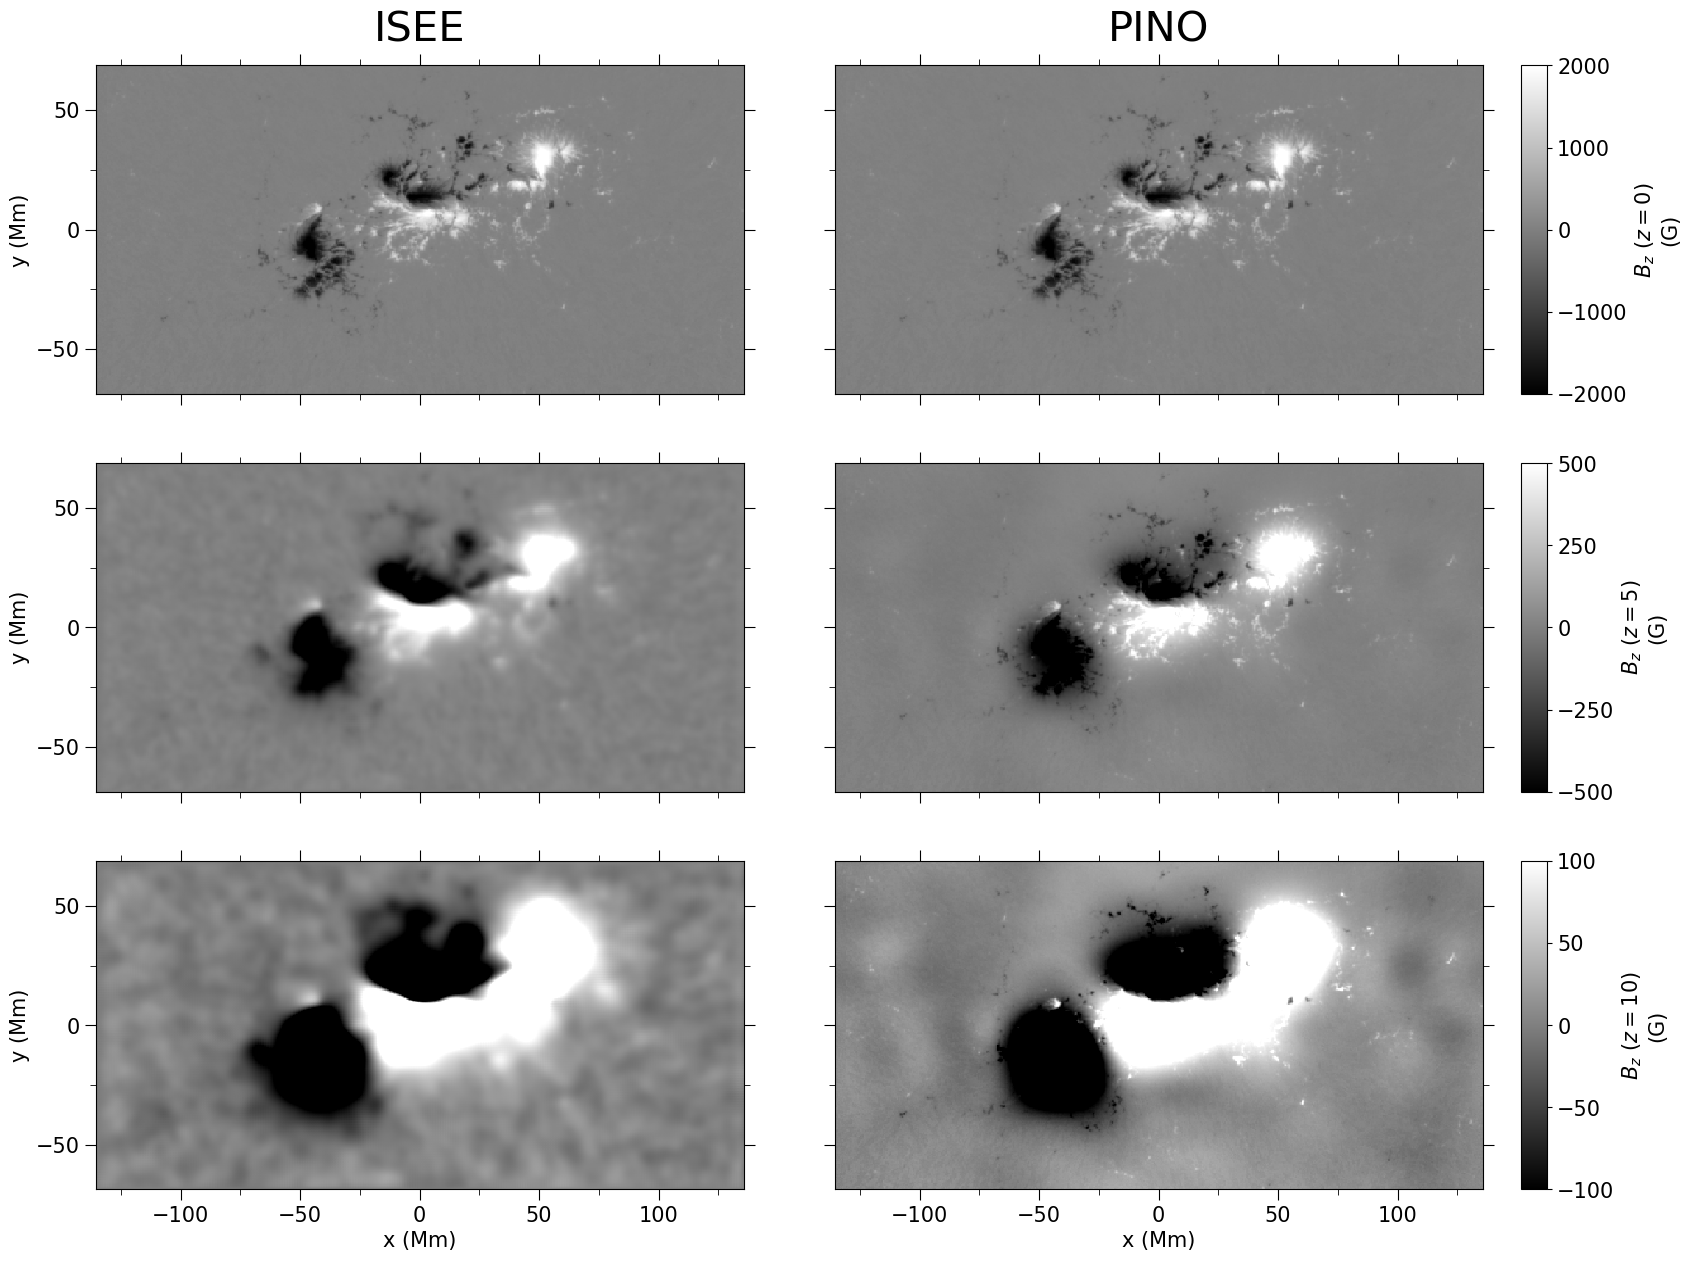

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(17, 13))

#------------------------------------------------------------------------------
z = 0
vmm = 2000
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 0].set_aspect("equal")
axs[0, 0].xaxis.set_ticklabels([])
axs[0, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 0].tick_params(which='major', length=major_ticksize)
axs[0, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 1].set_aspect("equal")
axs[0, 1].xaxis.set_ticklabels([])
axs[0, 1].yaxis.set_ticklabels([])
axs[0, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 1].tick_params(which='major', length=major_ticksize)
axs[0, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 5
vmm = 500
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 0].set_aspect("equal")
axs[1, 0].xaxis.set_ticklabels([])
axs[1, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 0].tick_params(which='major', length=major_ticksize)
axs[1, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].sharex(axs[0, 1])
# axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 1].set_aspect("equal")
axs[1, 1].xaxis.set_ticklabels([])
axs[1, 1].yaxis.set_ticklabels([])
axs[1, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 1].tick_params(which='major', length=major_ticksize)
axs[1, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 10
vmm = 100
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[2, 0].set_xlabel("x (Mm)", fontsize=label_fontsize)
# axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 0].set_aspect("equal")
axs[2, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 0].tick_params(which='major', length=major_ticksize)
axs[2, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[2, 1].set_xlabel("x (Mm)", fontsize=label_fontsize)
# axs[2, 1].sharex(axs[0, 1])
# axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 1].set_aspect("equal")
axs[2, 1].yaxis.set_ticklabels([])
axs[2, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 1].tick_params(which='major', length=major_ticksize)
axs[2, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

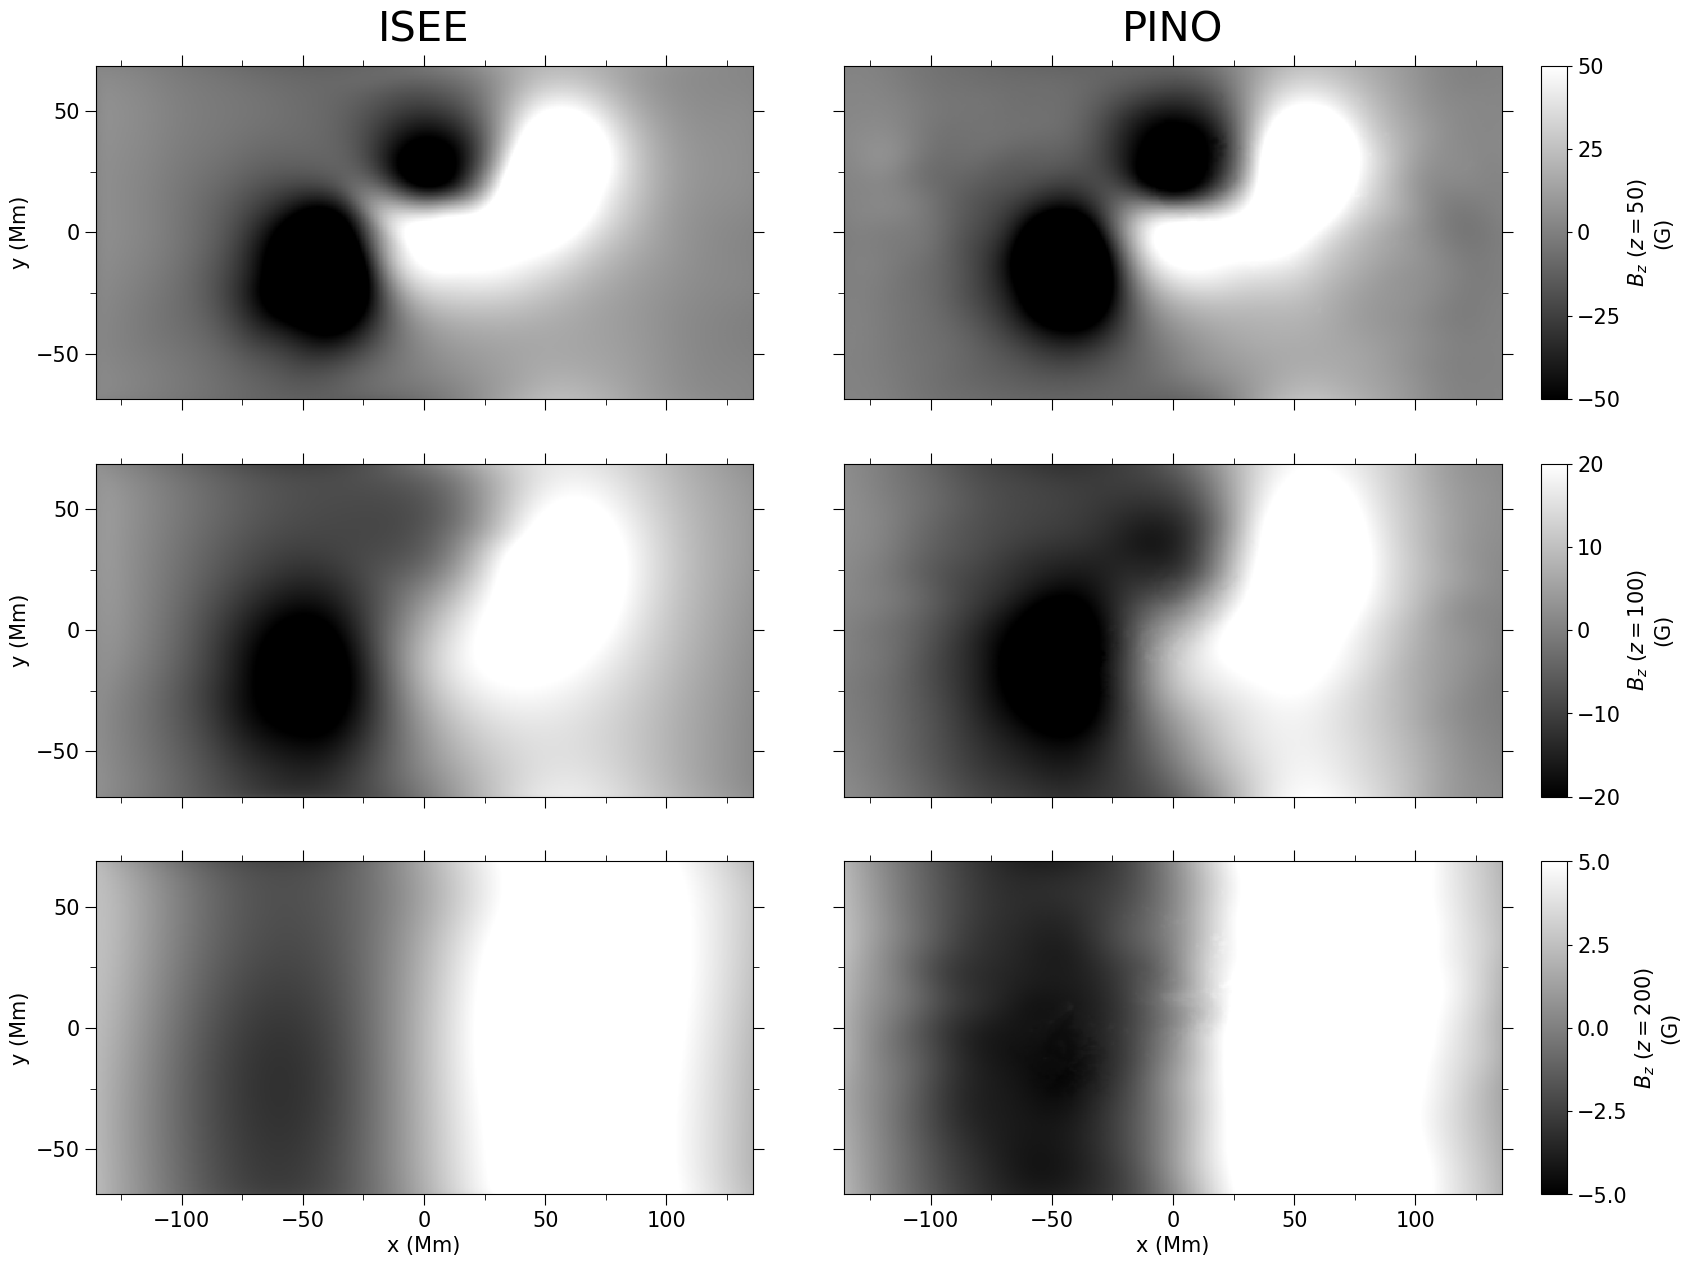

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(17, 13))

#------------------------------------------------------------------------------
z = 50
vmm = 50
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 0].set_aspect("equal")
axs[0, 0].xaxis.set_ticklabels([])
axs[0, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 0].tick_params(which='major', length=major_ticksize)
axs[0, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 1].set_aspect("equal")
axs[0, 1].xaxis.set_ticklabels([])
axs[0, 1].yaxis.set_ticklabels([])
axs[0, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 1].tick_params(which='major', length=major_ticksize)
axs[0, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 100
vmm = 20
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 0].set_aspect("equal")
axs[1, 0].xaxis.set_ticklabels([])
axs[1, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 0].tick_params(which='major', length=major_ticksize)
axs[1, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].sharex(axs[0, 1])
# axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 1].set_aspect("equal")
axs[1, 1].xaxis.set_ticklabels([])
axs[1, 1].yaxis.set_ticklabels([])
axs[1, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 1].tick_params(which='major', length=major_ticksize)
axs[1, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 200
vmm = 5
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[2, 0].set_xlabel("x (Mm)", fontsize=label_fontsize)
# axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 0].set_aspect("equal")
axs[2, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 0].tick_params(which='major', length=major_ticksize)
axs[2, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[2, 1].set_xlabel("x (Mm)", fontsize=label_fontsize)
# axs[2, 1].sharex(axs[0, 1])
# axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 1].set_aspect("equal")
axs[2, 1].yaxis.set_ticklabels([])
axs[2, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 1].tick_params(which='major', length=major_ticksize)
axs[2, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

In [16]:
nsteps = 10000
step_size = 0.1
tracer = StreamTracer(nsteps, step_size)

Lx = 512
Ly = 256
numbers = 20
# xmin, xmax, ymin, ymax
xyranges = [
    [0.30, 0.35, 0.50, 0.55],
    [0.45, 0.50, 0.60, 0.65],
    [0.65, 0.70, 0.70, 0.80],
    [0.35, 0.40, 0.30, 0.35],
    [0.35, 0.40, 0.40, 0.45],
    [0.30, 0.35, 0.30, 0.35],
    [0.70, 0.75, 0.70, 0.75],
    [0.32, 0.35, 0.40, 0.45],
]
grid_spacing = [1, 1, 1]

grid = VectorGrid(b, grid_spacing)
grid_true = VectorGrid(B, grid_spacing)

seeds_xs = []
tracer_xs = []
tracer_xs_true = []

for xyrange in xyranges:

    xrange = np.array(xyrange[:2]) * (Lx-1)
    yrange = np.array(xyrange[2:]) * (Ly-1)

    np.random.seed(0)
    seeds = np.random.rand(numbers, 3) * [1, 1, 0]
    seeds[:, 0] = seeds[:, 0] * (xrange[1] - xrange[0]) + xrange[0]
    seeds[:, 1] = seeds[:, 1] * (yrange[1] - yrange[0]) + yrange[0]
    seeds_xs.append(seeds)

    tracer.trace(seeds, grid)
    tracer_xs.append(tracer.xs)
    tracer.trace(seeds, grid_true)
    tracer_xs_true.append(tracer.xs)


seeds_xs = np.vstack(seeds_xs)
tracer_xs = [item for sublist in tracer_xs for item in sublist]
tracer_xs_true = [item for sublist in tracer_xs_true for item in sublist]

In [ ]:
hmi_t_rec = hmi_Br_map.meta['t_rec']
aia_171_t_obs = aia_171_map.meta['t_obs']
hmi_t = [hmi_t_rec[:4], hmi_t_rec[5:7], hmi_t_rec[8:10], hmi_t_rec[11:13], hmi_t_rec[14:16], hmi_t_rec[17:19]]
hmi_t = hmi_t[0]+'-'+hmi_t[1]+'-'+hmi_t[2]+'T'+hmi_t[3]+':'+hmi_t[4]+':'+ hmi_t[5]
hmi_t = Time(hmi_t, format='isot', scale='tai')
aia_171_t = Time(aia_171_t_obs, format='isot', scale='utc')
hmi_title = "HMI"
aia_171_title = "AIA 171"

hmi_timestamp = hmi_t.strftime('%Y-%m-%d %H:%M')
aia_171_timestamp = aia_171_t.strftime('%Y-%m-%d %H:%M')

new_dimensions = [512, 256] * u.pixel
hmi_resampled_map = hmi_Br_map.resample(new_dimensions)
aia_171_resampled_map = aia_171.resample(new_dimensions)

hmi_seedcolor = 'blue'
hmi_seedsize = 1
hmi_linecolor = 'blue'
hmi_linesize = 1

aia_171_seedcolor = 'white'
aia_171_seedsize = 1
aia_171_linecolor = 'white'
aia_171_linesize = 1

In [ ]:
xfactor = ((x[-1]-x[0])/(Lx-1)) 
yfactor = ((y[-1]-y[0])/(Ly-1)) 

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10))


tit = (0.02, 0.90)
times = (0.67, 0.05)

vmm = 2000

# ISEE ---------------------------------------------------------------
axs[0, 0].pcolormesh(x, y, hmi_resampled_map.data, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=fl_title_fontsize, y=fl_title_y)
axs[0, 0].set_ylabel("y (Mm)", fontsize=fl_label_fontsize)
axs[0, 0].tick_params(labelsize=fl_tick_fontsize, which='both', top=True, right=True)
axs[0, 0].tick_params(which='major', length=fl_major_ticksize)
axs[0, 0].tick_params(which='minor', length=fl_major_ticksize/2)
axs[0, 0].set_aspect("equal")
axs[0, 0].xaxis.set_ticklabels([])
axs[0, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 0].annotate(f"{hmi_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
axs[0, 0].annotate(f"{hmi_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
for xl in tracer_xs_true:
    axs[0, 0].plot(xl[:,0]*xfactor + x[0], xl[:,1]*yfactor + y[0], color=hmi_linecolor, linewidth=hmi_linesize)

axs[1, 0].pcolormesh(x, y, aia_171_resampled_map.data, 
                     cmap = aia_171_resampled_map.plot_settings['cmap'],
                     norm = aia_171_resampled_map.plot_settings['norm'])
axs[1, 0].set_title("")
axs[1, 0].set_xlabel("x (Mm)", fontsize=fl_label_fontsize)
axs[1, 0].set_ylabel("y (Mm)", fontsize=fl_label_fontsize)
axs[1, 0].tick_params(labelsize=fl_tick_fontsize, which='both', top=True, right=True)
axs[1, 0].tick_params(which='major', length=fl_major_ticksize)
axs[1, 0].tick_params(which='minor', length=fl_major_ticksize/2)
axs[1, 0].set_aspect("equal")
axs[1, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 0].annotate(f"{aia_171_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
axs[1, 0].annotate(f"{aia_171_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
for xl in tracer_xs_true:
    axs[1, 0].plot(xl[:,0]*xfactor + x[0], xl[:,1]*yfactor + y[0], color=aia_171_linecolor, linewidth=aia_171_linesize)


# PINO ---------------------------------------------------------------
axs[0, 1].pcolormesh(x, y, hmi_resampled_map.data, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=fl_title_fontsize, y=fl_title_y)
axs[0, 1].tick_params(labelsize=fl_tick_fontsize, which='both', top=True, right=True)
axs[0, 1].tick_params(which='major', length=fl_major_ticksize)
axs[0, 1].tick_params(which='minor', length=fl_major_ticksize/2)
axs[0, 1].set_aspect("equal")
# axs[0, 1].sharey(axs[0, 0])
axs[0, 1].xaxis.set_ticklabels([])
axs[0, 1].yaxis.set_ticklabels([])
axs[0, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
for xl in tracer_xs:
    axs[0, 1].plot(xl[:,0]*xfactor + x[0], xl[:,1]*yfactor + y[0], color=hmi_linecolor, linewidth=hmi_linesize)

axs[1, 1].pcolormesh(x, y, aia_171_resampled_map.data, 
                     cmap = aia_171_resampled_map.plot_settings['cmap'],
                     norm = aia_171_resampled_map.plot_settings['norm'])
axs[1, 1].set_title("")
axs[1, 1].set_xlabel("x (Mm)", fontsize=fl_label_fontsize)
axs[1, 1].tick_params(labelsize=fl_tick_fontsize, which='both', top=True, right=True)
axs[1, 1].tick_params(which='major', length=fl_major_ticksize)
axs[1, 1].tick_params(which='minor', length=fl_major_ticksize/2)
axs[1, 1].set_aspect("equal")
axs[1, 1].yaxis.set_ticks([])
axs[1, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
for xl in tracer_xs:
    axs[1, 1].plot(xl[:,0]*xfactor + x[0], xl[:,1]*yfactor + y[0], color=aia_171_linecolor, linewidth=aia_171_linesize)

plt.tight_layout()
plt.show()

In [ ]:
aia_94_title = "AIA 94"
aia_94_t_obs = aia_94_map.meta['t_obs']
aia_94_t = Time(aia_94_t_obs, format='isot', scale='utc')
aia_94_timestamp = aia_94_t.strftime('%Y-%m-%d %H:%M')
aia_94_resampled_map = aia_94.resample(new_dimensions)
aia_94_linecolor = 'yellow'
aia_94_linesize = 1

aia_131_title = "AIA 131"
aia_131_t_obs = aia_131_map.meta['t_obs']
aia_131_t = Time(aia_131_t_obs, format='isot', scale='utc')
aia_131_timestamp = aia_131_t.strftime('%Y-%m-%d %H:%M')
aia_131_resampled_map = aia_131.resample(new_dimensions)
aia_131_linecolor = 'yellow'
aia_131_linesize = 1

aia_193_title = "AIA 193"
aia_193_t_obs = aia_193_map.meta['t_obs']
aia_193_t = Time(aia_193_t_obs, format='isot', scale='utc')
aia_193_timestamp = aia_193_t.strftime('%Y-%m-%d %H:%M')
aia_193_resampled_map = aia_193.resample(new_dimensions)
aia_193_linecolor = 'yellow'
aia_193_linesize = 1


fig = plt.figure(figsize=(17, 15))

# ISEE ---------------------------------------------------------------
ax = fig.add_subplot(321, projection=aia_94_resampled_map)
aia_94_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_94_linecolor, linewidth=aia_94_linesize)
ax.set_title(left_title, fontsize=title_fontsize, y=title_y)
ax.annotate(f"{aia_94_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_94_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(323, projection=aia_131_resampled_map)
aia_131_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_131_linecolor, linewidth=aia_131_linesize)
ax.set_title("")
ax.annotate(f"{aia_131_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_131_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(325, projection=aia_193_resampled_map)
aia_193_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_193_linecolor, linewidth=aia_193_linesize)
ax.set_title("")
ax.annotate(f"{aia_193_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_193_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel("Carrington Longitude", fontsize=label_fontsize)
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

# PINO ---------------------------------------------------------------
ax = fig.add_subplot(322, projection=aia_94_resampled_map)
aia_94_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_94_linecolor, linewidth=aia_94_linesize)
ax.set_title(right_title, fontsize=title_fontsize, y=title_y)
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(324, projection=aia_131_resampled_map)
aia_131_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_131_linecolor, linewidth=aia_131_linesize)
ax.set_title("")
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(326, projection=aia_193_resampled_map)
aia_193_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_193_linecolor, linewidth=aia_193_linesize)
ax.set_title("")
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel("Carrington Longitude", fontsize=label_fontsize)
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
aia_211_title = "AIA 211"
aia_211_t_obs = aia_211_map.meta['t_obs']
aia_211_t = Time(aia_211_t_obs, format='isot', scale='utc')
aia_211_timestamp = aia_211_t.strftime('%Y-%m-%d %H:%M')
aia_211_resampled_map = aia_211.resample(new_dimensions)
aia_211_linecolor = 'yellow'
aia_211_linesize = 1

aia_304_title = "AIA 304"
aia_304_t_obs = aia_304_map.meta['t_obs']
aia_304_t = Time(aia_304_t_obs, format='isot', scale='utc')
aia_304_timestamp = aia_304_t.strftime('%Y-%m-%d %H:%M')
aia_304_resampled_map = aia_304.resample(new_dimensions)
aia_304_linecolor = 'yellow'
aia_304_linesize = 1

aia_335_title = "AIA 335"
aia_335_t_obs = aia_335_map.meta['t_obs']
aia_335_t = Time(aia_335_t_obs, format='isot', scale='utc')
aia_335_timestamp = aia_335_t.strftime('%Y-%m-%d %H:%M')
aia_335_resampled_map = aia_335.resample(new_dimensions)
aia_335_linecolor = 'yellow'
aia_335_linesize = 1


fig = plt.figure(figsize=(17, 15))

# ISEE ---------------------------------------------------------------
ax = fig.add_subplot(321, projection=aia_211_resampled_map)
aia_211_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_211_linecolor, linewidth=aia_211_linesize)
ax.set_title(left_title, fontsize=title_fontsize, y=title_y)
ax.annotate(f"{aia_211_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_211_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(323, projection=aia_304_resampled_map)
aia_304_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_304_linecolor, linewidth=aia_304_linesize)
ax.set_title("")
ax.annotate(f"{aia_304_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_304_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(325, projection=aia_335_resampled_map)
aia_335_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=aia_335_linecolor, linewidth=aia_335_linesize)
ax.set_title("")
ax.annotate(f"{aia_335_title}", xy=tit, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
ax.annotate(f"{aia_335_timestamp}", xy=times, xycoords='axes fraction', color='white', fontsize=annotation_fontsize)
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel("Carrington Longitude", fontsize=label_fontsize)
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

# PINO ---------------------------------------------------------------
ax = fig.add_subplot(322, projection=aia_211_resampled_map)
aia_211_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_211_linecolor, linewidth=aia_211_linesize)
ax.set_title(right_title, fontsize=title_fontsize, y=title_y)
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(324, projection=aia_304_resampled_map)
aia_304_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_304_linecolor, linewidth=aia_304_linesize)
ax.set_title("")
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel(" ")
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

ax = fig.add_subplot(326, projection=aia_335_resampled_map)
aia_335_resampled_map.plot(axes=ax)
ax.set_aspect('equal')
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=aia_335_linecolor, linewidth=aia_335_linesize)
ax.set_title("")
lat = ax.coords[1]
lat.set_axislabel("Latitude", fontsize=label_fontsize)
lon = ax.coords[0]
lon.set_axislabel("Carrington Longitude", fontsize=label_fontsize)
lon.set_ticklabel(size=tick_fontsize)
lat.set_ticklabel(size=tick_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
j = current_density(b, dx, dy, dz)  # [mA/m^2]
j_map = vector_norm(j).sum(2) 
j_map *= 1e-7 # A/cm^2
j_map *= dz # A/cm

In [ ]:
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2) # A/m^2
J_map *= 1e-7 # A/cm^2
J_map *= dz # A/cm

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(17, 13))

#------------------------------------------------------------------------------
z = 0
vmm = 50
axs[0, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 0].set_aspect("equal")
axs[0, 0].xaxis.set_ticklabels([])
axs[0, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 0].tick_params(which='major', length=major_ticksize)
axs[0, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 1].set_aspect("equal")
axs[0, 1].xaxis.set_ticklabels([])
axs[0, 1].yaxis.set_ticklabels([])
axs[0, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 1].tick_params(which='major', length=major_ticksize)
axs[0, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$J_z$ $(z='+f'{z}'+')$\n(mA/m$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 5
vmm = 5
axs[1, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[1, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 0].set_aspect("equal")
axs[1, 0].xaxis.set_ticklabels([])
axs[1, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 0].tick_params(which='major', length=major_ticksize)
axs[1, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[1, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 1].set_aspect("equal")
axs[1, 1].xaxis.set_ticklabels([])
axs[1, 1].yaxis.set_ticklabels([])
axs[1, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 1].tick_params(which='major', length=major_ticksize)
axs[1, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$J_z$ $(z='+f'{z}'+')$\n(mA/m$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 10
vmm = 1
axs[2, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[2, 0].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[2, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 0].set_aspect("equal")
axs[2, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 0].tick_params(which='major', length=major_ticksize)
axs[2, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[2, 1].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[2, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 1].set_aspect("equal")
axs[2, 1].yaxis.set_ticklabels([])
axs[2, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 1].tick_params(which='major', length=major_ticksize)
axs[2, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(17, 13))

#------------------------------------------------------------------------------
z = 50
vmm = 0.5
axs[0, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 0].set_aspect("equal")
axs[0, 0].xaxis.set_ticklabels([])
axs[0, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 0].tick_params(which='major', length=major_ticksize)
axs[0, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0, 1].set_aspect("equal")
axs[0, 1].xaxis.set_ticklabels([])
axs[0, 1].yaxis.set_ticklabels([])
axs[0, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0, 1].tick_params(which='major', length=major_ticksize)
axs[0, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$J_z$ $(z='+f'{z}'+')$\n(mA/m$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 100
vmm = 0.05
axs[1, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[1, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 0].set_aspect("equal")
axs[1, 0].xaxis.set_ticklabels([])
axs[1, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 0].tick_params(which='major', length=major_ticksize)
axs[1, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[1, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1, 1].set_aspect("equal")
axs[1, 1].xaxis.set_ticklabels([])
axs[1, 1].yaxis.set_ticklabels([])
axs[1, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1, 1].tick_params(which='major', length=major_ticksize)
axs[1, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$J_z$ $(z='+f'{z}'+')$\n(mA/m$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

#------------------------------------------------------------------------------
z = 200
vmm = 0.005
axs[2, 0].pcolormesh(x, y, J[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[2, 0].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[2, 0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 0].set_aspect("equal")
axs[2, 0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 0].tick_params(which='major', length=major_ticksize)
axs[2, 0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, j[:, :, z, 2].T, cmap="seismic", vmin=-vmm, vmax=vmm)
axs[2, 1].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[2, 1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[2, 1].set_aspect("equal")
axs[2, 1].yaxis.set_ticklabels([])
axs[2, 1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[2, 1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[2, 1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[2, 1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[2, 1].tick_params(which='major', length=major_ticksize)
axs[2, 1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
vmin = 500
vmax = 3000

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

#------------------------------------------------------------------------------
z = 50
vmm = 50
axs[0].pcolormesh(x, y, J_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0].set_aspect("equal")
axs[0].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0].tick_params(which='major', length=major_ticksize)
axs[0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1].pcolormesh(x, y, j_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title(right_title, fontsize=title_fontsize, y=title_y)
axs[1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1].set_aspect("equal")
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1].tick_params(which='major', length=major_ticksize)
axs[1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax)
cb.set_label('Integrated current density\n(mA/cm)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
e_den = (vector_norm(b)**2)/(8*np.pi)   # erg/cm^3
E_den = (vector_norm(B)**2)/(8*np.pi)

e_map = e_den.sum(2) * dz   # erg/cm^2
E_map = E_den.sum(2) * dz

Ep_den = (vector_norm(Bp)**2)/(8*np.pi)
Ep_map = Ep_den.sum(2) * dz

E_free_map = E_map - Ep_map
e_free_map = e_map - Ep_map

In [ ]:
vmin = 1e11
vmax = 5e13

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

#------------------------------------------------------------------------------
z = 50
vmm = 50
axs[0].pcolormesh(x, y, E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0].set_aspect("equal")
axs[0].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0].tick_params(which='major', length=major_ticksize)
axs[0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1].pcolormesh(x, y, e_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title(right_title, fontsize=title_fontsize, y=title_y)
axs[1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1].set_aspect("equal")
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1].tick_params(which='major', length=major_ticksize)
axs[1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax)
cb.set_label('Integrated energy density\n(erg/cm$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()

In [ ]:
vmin = 1e12
vmax = 1e13

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

#------------------------------------------------------------------------------
z = 50
vmm = 50
axs[0].pcolormesh(x, y, E_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title(left_title, fontsize=title_fontsize, y=title_y)
axs[0].set_ylabel("y (Mm)", fontsize=label_fontsize)
axs[0].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[0].set_aspect("equal")
axs[0].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[0].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[0].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[0].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[0].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[0].tick_params(which='major', length=major_ticksize)
axs[0].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1].pcolormesh(x, y, e_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title(right_title, fontsize=title_fontsize, y=title_y)
axs[1].tick_params(labelsize=tick_fontsize, which='both', top=True, right=True)
axs[1].set_aspect("equal")
axs[1].yaxis.set_ticklabels([])
axs[1].set_xlabel("x (Mm)", fontsize=label_fontsize)
axs[1].xaxis.set_major_locator(MultipleLocator(xlocator))
axs[1].xaxis.set_minor_locator(MultipleLocator(xlocator/2))
axs[1].yaxis.set_major_locator(MultipleLocator(ylocator))
axs[1].yaxis.set_minor_locator(MultipleLocator(ylocator/2))
axs[1].tick_params(which='major', length=major_ticksize)
axs[1].tick_params(which='minor', length=major_ticksize/2)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size=bar_size, pad=bar_pad)
cb = fig.colorbar(im, cax=cax)
cb.set_label('Integrated free energy density\n(erg/cm$^2$)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)

plt.tight_layout()
plt.show()